# Set up the environment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pyextremes import __version__, EVA, get_extremes
from pyextremes.models import Emcee
from pyextremes.plotting import (
    plot_extremes,
    pyextremes_rc,
    plot_trace,
    plot_corner,
)
print("pyextremes", __version__)

pyextremes 2.0.1


# Main page

In [2]:
series = pd.read_csv(
    "../../data/battery_wl.csv",
    index_col=0,
    parse_dates=True,
    squeeze=True,
)
series = (
    series
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
)
series = series.loc[pd.to_datetime("1925"):]
series = series - (series.index.array - pd.to_datetime("1992")) / pd.to_timedelta("365.2425D") * 2.87e-3
print(series.head())

Date-Time (GMT)
1926-11-20 05:00:00   -0.411120
1926-11-20 06:00:00   -0.777120
1926-11-20 07:00:00   -1.051120
1926-11-20 08:00:00   -1.051121
1926-11-20 09:00:00   -0.808121
Name: Water Elevation [m NAVD88], dtype: float64


In [3]:
model = EVA(series)
model.get_extremes(
    method="BM",
    extremes_type="high",
    block_size="365.2425D",
    errors="raise",
)
print(model.extremes.head())

Date-Time (GMT)
1927-02-20 16:00:00    1.670154
1927-12-05 10:00:00    1.432893
1929-04-16 19:00:00    1.409977
1930-08-23 01:00:00    1.202101
1931-03-08 17:00:00    1.529547
Name: Water Elevation [m NAVD88], dtype: float64


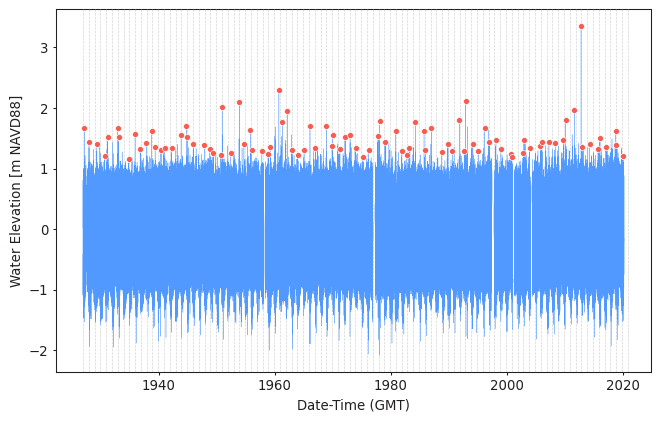

In [4]:
fig, ax = model.plot_extremes()
fig.savefig("documentation figures/index extremes.png", bbox_inches="tight")

In [5]:
model.fit_model()

In [6]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
print(summary)

               return value  lower ci  upper ci
return period                                  
1.0                0.802610 -0.116242  1.027489
2.0                1.409343  1.371460  1.451082
5.0                1.622565  1.548721  1.709406
10.0               1.803499  1.682255  1.949466
25.0               2.090267  1.864556  2.407082
50.0               2.354889  2.017399  2.869224
100.0              2.671313  2.170285  3.508498
250.0              3.188356  2.391360  4.761147
500.0              3.671580  2.559526  6.077716
1000.0             4.252220  2.747092  7.838203


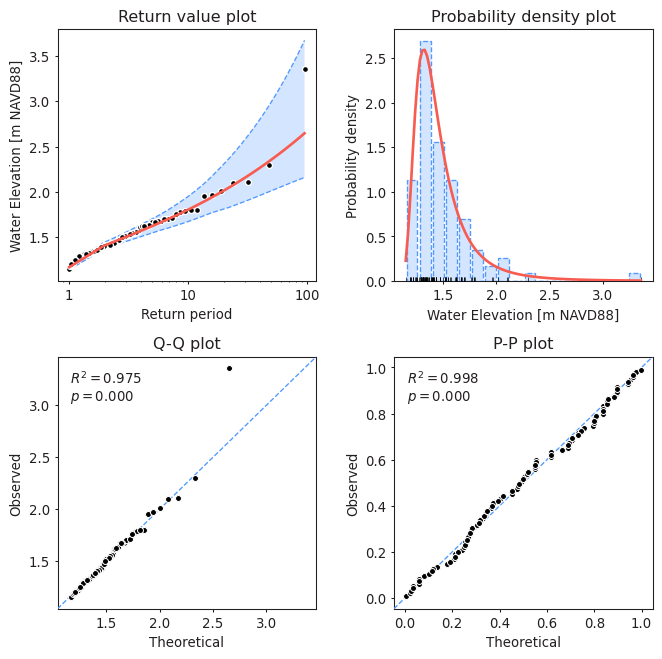

In [7]:
fig, ax = model.plot_diagnostic(alpha=0.95)
fig.savefig("documentation figures/index diagnostic.png", bbox_inches="tight")

In [8]:
print(model)

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:    Water Elevation [m NAVD88]      Size:                             796,751
Start:                      November 1926      End:                           March 2020
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 94      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               